https://saralgyaan.com/posts/python-candlestick-chart-matplotlib-tutorial-chapter-11/


In [2]:
!pip install yfinance

In [3]:
!pip install mpl_finance

In [49]:
import pandas as pd
import numpy as np
import yfinance
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12, 7]

plt.rc('font', size=14) 

In [51]:
name = 'SPY'
ticker = yfinance.Ticker(name)
df = ticker.history(interval="1d",start="2020-03-15",end="2020-07-15")
# df = pd.read_csv('stock.csv')
df.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-03-16,234.464984,249.747304,230.751350,233.172028,297240000,0.000,0
2020-03-17,238.217521,249.037656,230.469438,245.761475,262070500,0.000,0
2020-03-18,229.672264,241.454811,221.671410,233.317856,327597100,0.000,0
2020-03-19,232.588731,240.492378,225.754464,233.813644,289322000,0.000,0
2020-03-20,237.163834,239.060912,223.444260,223.737625,347158800,1.406,0


In [52]:
# df.to_csv('stock.csv')

In [53]:
# df = pd.read_csv('stock.csv')
# df.head()

In [54]:
df['Date'] = pd.to_datetime(df.index)
df['Date'] = df['Date'].apply(mpl_dates.date2num)

df = df.loc[:,['Date', 'Open', 'High', 'Low', 'Close']]

In [70]:
df
df.to_csv('stock_1.csv')
df.head()

,Date,Open,High,Low,Close
Date,,,,,
2020-03-16,18337.0,234.464984,249.747304,230.751350,233.172028
2020-03-17,18338.0,238.217521,249.037656,230.469438,245.761475
2020-03-18,18339.0,229.672264,241.454811,221.671410,233.317856
2020-03-19,18340.0,232.588731,240.492378,225.754464,233.813644
2020-03-20,18341.0,237.163834,239.060912,223.444260,223.737625


In [76]:
df2 = pd.read_csv('stock_1.csv')
df2['Date'] = pd.to_datetime(df2.index)
df2['Date'] = df2['Date'].apply(mpl_dates.date2num)

df2 = df2.loc[:,['Date', 'Open', 'High', 'Low', 'Close']]
df2.head()

,Date,Open,High,Low,Close
0,0.0,234.464984,249.747304,230.751350,233.172028
1,0.0,238.217521,249.037656,230.469438,245.761475
2,0.0,229.672264,241.454811,221.671410,233.317856
3,0.0,232.588731,240.492378,225.754464,233.813644
4,0.0,237.163834,239.060912,223.444260,223.737625


In [61]:
def isSupport(df,i):
  support = df['Low'][i] < df['Low'][i-1]  and df['Low'][i] < df['Low'][i+1] \
  and df['Low'][i+1] < df['Low'][i+2] and df['Low'][i-1] < df['Low'][i-2]

  return support

def isResistance(df,i):
  resistance = df['High'][i] > df['High'][i-1]  and df['High'][i] > df['High'][i+1] \
  and df['High'][i+1] > df['High'][i+2] and df['High'][i-1] > df['High'][i-2] 

  return resistance

In [62]:
levels = []
for i in range(2,df.shape[0]-2):
  if isSupport(df,i):
    levels.append((i,df['Low'][i]))
  elif isResistance(df,i):
    levels.append((i,df['High'][i]))


In [63]:
def plot_all():
  fig, ax = plt.subplots()

  candlestick_ohlc(ax,df.values,width=0.6, \
                   colorup='green', colordown='red', alpha=0.8)

  date_format = mpl_dates.DateFormatter('%d %b %Y')
  ax.xaxis.set_major_formatter(date_format)
  fig.autofmt_xdate()

  fig.tight_layout()

  for level in levels:
    plt.hlines(level[1],xmin=df['Date'][level[0]],\
               xmax=max(df['Date']),colors='blue')
  fig.show()

<ipython-input-63-68179ade6d63>:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


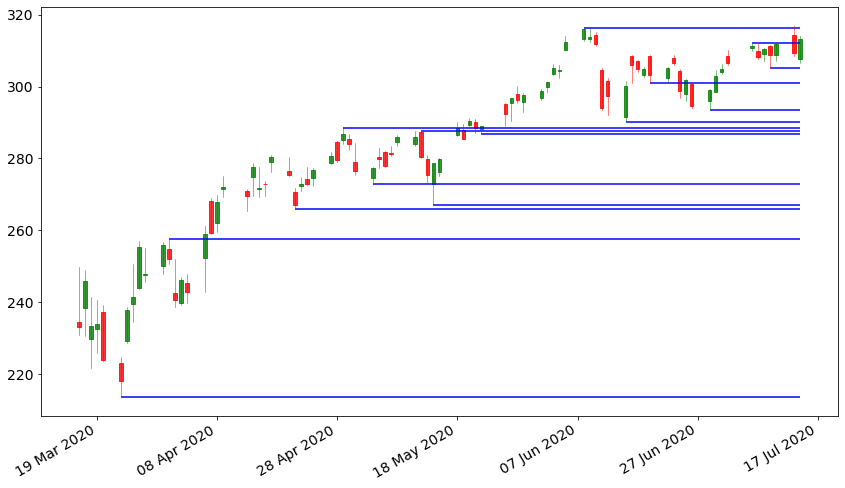

In [64]:
plot_all()

In [26]:
s =  np.mean(df['High'] - df['Low'])

In [27]:
def isFarFromLevel(l):
  return np.sum([abs(l-x) < s  for x in levels]) == 0

In [28]:
levels = []
for i in range(2,df.shape[0]-2):
  if isSupport(df,i):
    l = df['Low'][i]

    if isFarFromLevel(l):
      levels.append((i,l))

  elif isResistance(df,i):
    l = df['High'][i]

    if isFarFromLevel(l):
      levels.append((i,l))
    

In [29]:
levels

[(5, 213.43084168041827),
 (11, 257.50362941137655),
 (25, 266.0013589196828),
 (31, 288.35556680833133),
 (58, 316.25429541938666),
 (67, 301.06684177732353)]

<ipython-input-24-68179ade6d63>:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


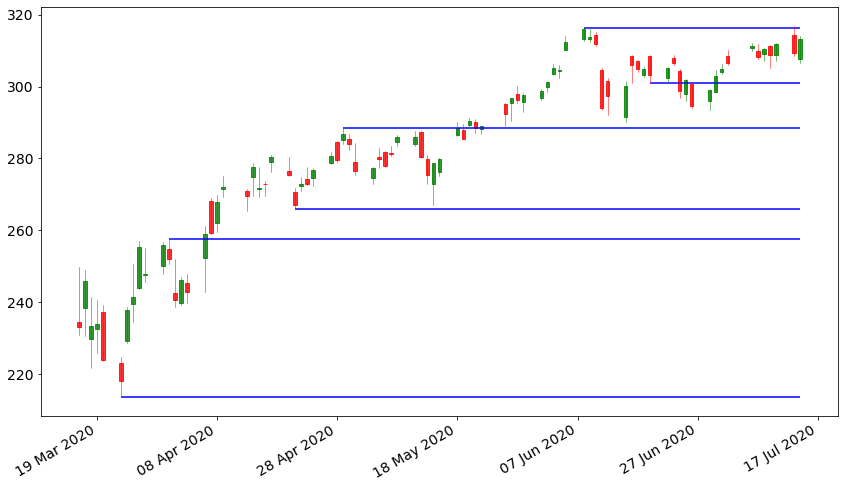

In [30]:
plot_all()